Project: Real Time Diabetic Retinopathy detection using CNN

Dataset: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-2015-data-colored-resizedavailable with Resampling, and after resampling data splitted as -

No_DR = 2085 img ; Mild - 1140 img ; Moderate - 1790 img ; Severe - 873 img Proliferate_DR - 708 img ;

Author: Samiul Bari

**Importing All Necessary Modules and Packages**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import plotly
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input,ZeroPadding2D,BatchNormalization,Activation
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [2]:
#Locate the file in Personal Machine
path = r'C:\My Files\MIST Study\Level-4 Term-2\BME 412 Sessional\Dataset\colored_images\colored_images_2'

In [3]:
No_DR_Img = os.listdir(path + '/No_DR/')
Mild_Img = os.listdir(path + '/Mild/')
Moderate_Img = os.listdir(path + '/Moderate/')
Proliferate_DR_Img = os.listdir(path + '/Proliferate_DR/')
Severe_Img = os.listdir(path + '/Severe/')

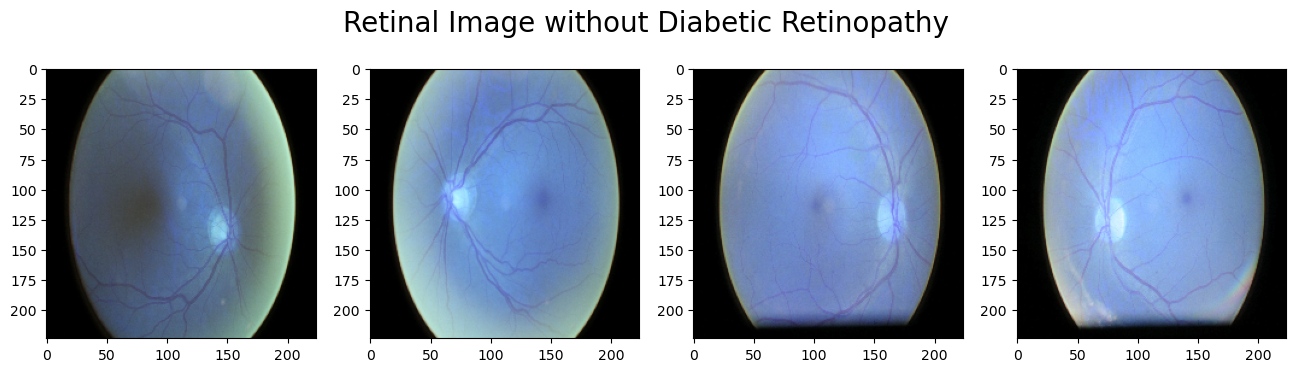

In [4]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/No_DR/'+ No_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image without Diabetic Retinopathy",fontsize=20)
plt.show()

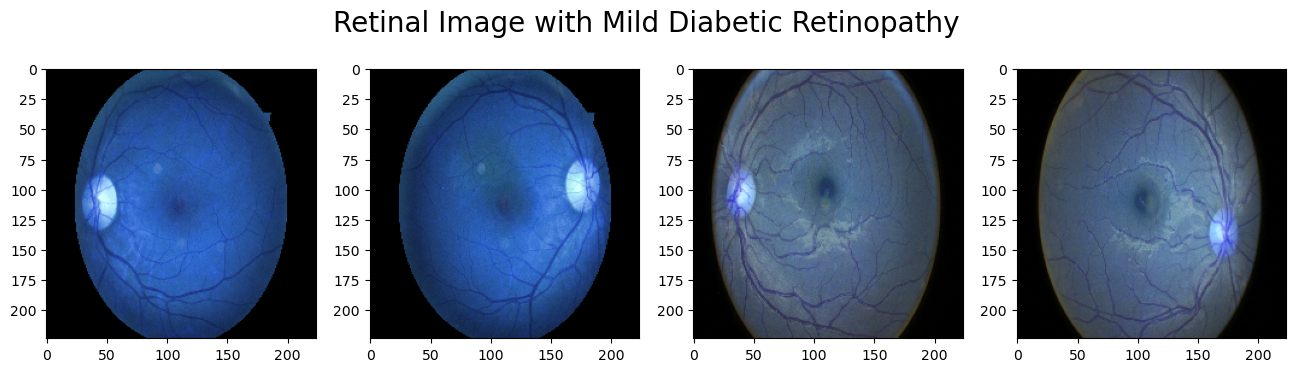

In [5]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Mild/'+ Mild_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Mild Diabetic Retinopathy",fontsize=20)
plt.show()

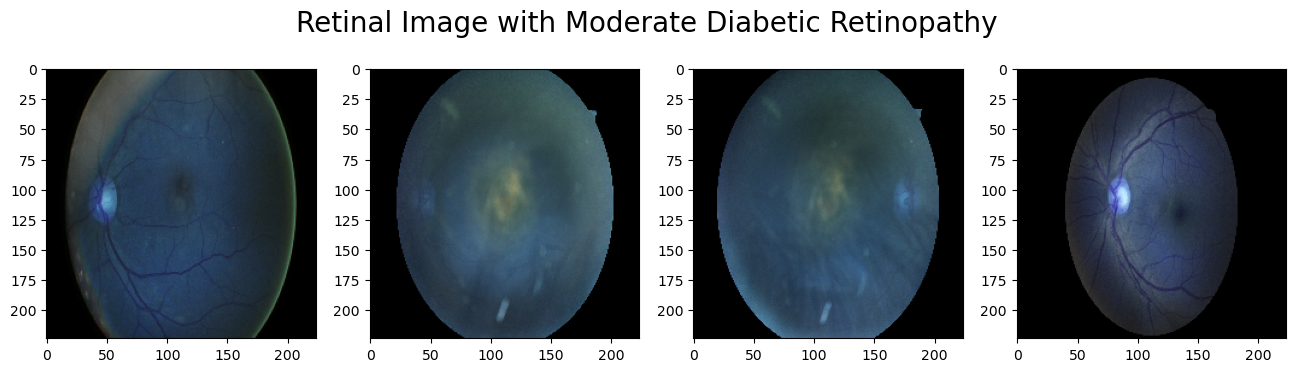

In [6]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Moderate/'+ Moderate_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Moderate Diabetic Retinopathy",fontsize=20)
plt.show()

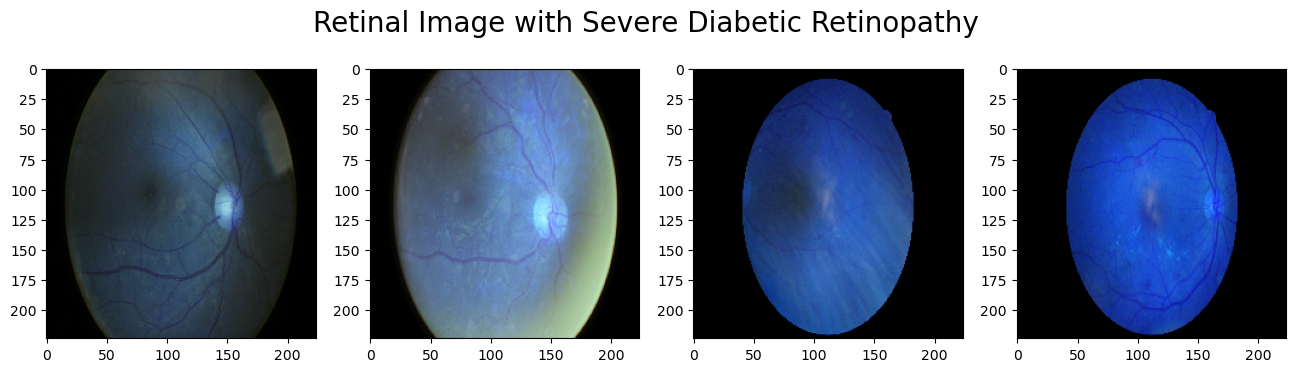

In [7]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Severe/'+ Severe_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Severe Diabetic Retinopathy",fontsize=20)
plt.show()

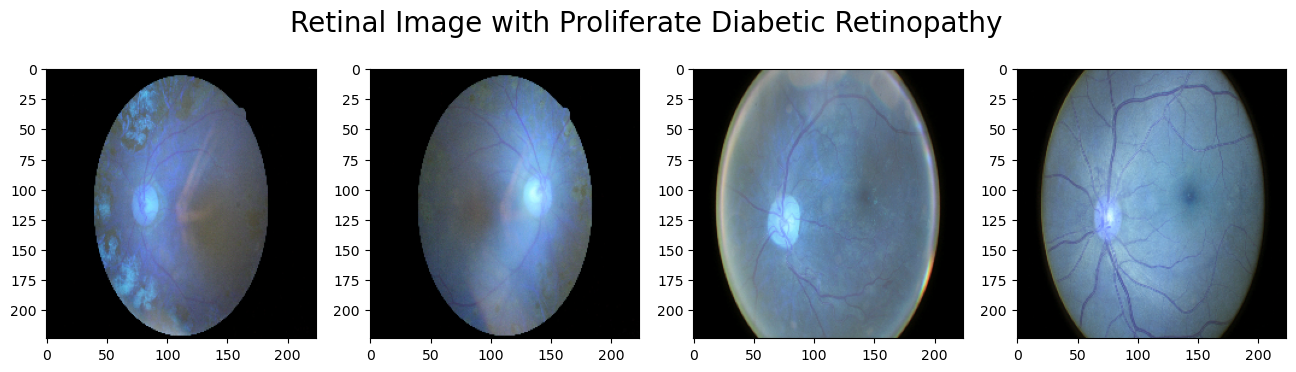

In [8]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Proliferate_DR/'+ Proliferate_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Proliferate Diabetic Retinopathy",fontsize=20)
plt.show()

In [9]:
Classes = {'No_DR':0, 'Mild':1, 'Moderate':2, 'Severe':3, 'Proliferate_DR':4}

**Data PreProcessing**

In [10]:
#Normalizing pixel values
X = []
y = []
for i in Classes:
    folder_path =r'C:\My Files\MIST Study\Level-4 Term-2\BME 412 Sessional\Dataset\colored_images\colored_images_2/' +i
    for j in os.listdir(folder_path):
        img = cv2.imread(folder_path+'/'+j, 0)
        #Convetig to 3-channel RGB image so that it can be trained using pre-trained model
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        # normalize values
        img = img / 255  #-->Apply normalization because we want pixel values to be scaled to the range 0-1
        X.append(img)
        y.append(Classes[i])

In [11]:
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((6596, 224, 224, 3), (6596,))

**Dataset Analysis**

In [12]:
#Class division

Class_series=pd.Series(y)
lis=["No_DR","Mild","Moderate","Severe","Proliferate_DR"]
DR_or_not = Class_series.value_counts().tolist()
values = [DR_or_not[0], DR_or_not[1], DR_or_not[2], DR_or_not[3], DR_or_not[4]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black","pink","purple","blue"]
             ,title="percentage among the different Severities of DR")
fig.show()

In [13]:
# Used to clean up the memory to get rid of gurbage data
import gc
gc.collect()

24002

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32, stratify=y)
#used stratify to balance the number of examples for each class

In [15]:
X_train.shape

(5276, 224, 224, 3)

In [16]:
X_test.shape

(1320, 224, 224, 3)

In [17]:
X_train = X_train.reshape( (-1,224,224,3))
X_test = X_test.reshape((-1,224,224,3))

**Import the Model Architecture (VGG 16)**

In [18]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [19]:
vgg = MobileNetV2(input_shape=(224,224,3),weights='imagenet',include_top=False)

In [20]:
for layer in vgg.layers:
  layer.trainable=False

In [21]:
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout,Activation,BatchNormalization,Lambda

In [22]:
x = Flatten()(vgg.output)
prediction = Dense(5,activation='softmax')(x)

In [23]:
from tensorflow.keras.models import Model

In [24]:
model = Model(inputs=vgg.input, outputs=prediction)

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [26]:
gc.collect()

508

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [29]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

#Early Stopping

es = EarlyStopping(monitor='val_accuracy', min_delta = 0.01, patience=5, verbose=1, mode='auto')

#Model Check Point

mc = ModelCheckpoint(monitor='val_accuracy', filepath = './bestmodel.h5', verbose=1, save_best_only = True, mode='auto')

cd = [es,mc]

In [30]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy']
)

In [31]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=15,
          callbacks=cd,
          batch_size = 32,
          shuffle=True)

Epoch 1/15
165/165 [==============================] - ETA: 0s - loss: 5.9945 - accuracy: 0.3357
Epoch 1: val_accuracy improved from -inf to 0.30606, saving model to .\bestmodel.h5
165/165 [==============================] - 328s 2s/step - loss: 5.9945 - accuracy: 0.3357 - val_loss: 4.6413 - val_accuracy: 0.3061
Epoch 2/15
165/165 [==============================] - ETA: 0s - loss: 2.8802 - accuracy: 0.5260
Epoch 2: val_accuracy improved from 0.30606 to 0.33106, saving model to .\bestmodel.h5
165/165 [==============================] - 287s 2s/step - loss: 2.8802 - accuracy: 0.5260 - val_loss: 4.8258 - val_accuracy: 0.3311
Epoch 3/15
165/165 [==============================] - ETA: 0s - loss: 2.0812 - accuracy: 0.6300
Epoch 3: val_accuracy improved from 0.33106 to 0.35682, saving model to .\bestmodel.h5
165/165 [==============================] - 286s 2s/step - loss: 2.0812 - accuracy: 0.6300 - val_loss: 5.3445 - val_accuracy: 0.3568
Epoch 4/15
165/165 [==============================] - ETA:

In [32]:
history = model.history.history
model_loss=pd.DataFrame(model.history.history)

In [33]:
def plot_metrics(history):

    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

     # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

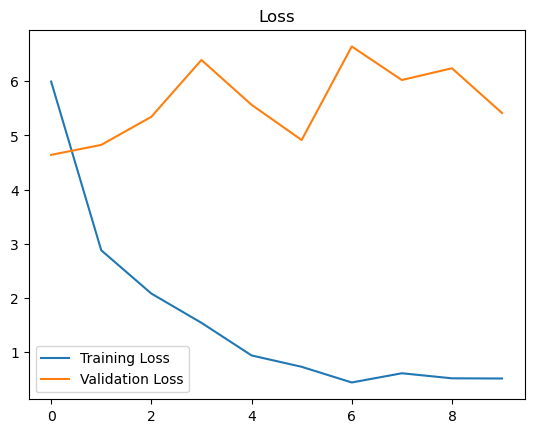

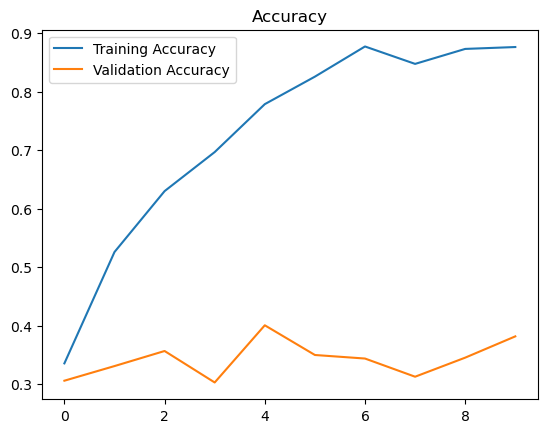

In [34]:
plot_metrics(history)

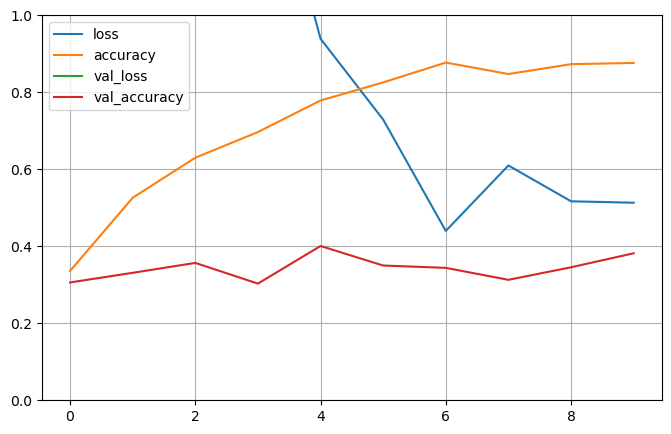

In [35]:
model_loss.plot (figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
X.shape

(6596, 224, 224, 3)

In [37]:
X = X.reshape(-1, 224, 224, 3)

In [38]:
Model_evaluation = model.evaluate(X_train, y_train)
print(f"%\nAccuracy: {Model_evaluation[1]*100:.4f} %")

165/165 [==============================] - 231s 1s/step - loss: 0.1158 - accuracy: 0.9606
%
Accuracy: 96.0576 %


In [39]:
y_predicted_tf = model.predict(X_test)

42/42 [==============================] - 62s 1s/step


In [40]:
y_predicted_tf

array([[8.7013692e-01, 7.7322632e-02, 9.3666179e-04, 1.9651277e-02,
        3.1952519e-02],
       [1.8699364e-04, 1.0097922e-01, 7.0536453e-01, 1.8445757e-01,
        9.0116458e-03],
       [5.3802039e-04, 1.3694303e-07, 8.6738281e-02, 3.6876742e-02,
        8.7584686e-01],
       ...,
       [6.7583764e-16, 6.6380414e-13, 2.8379725e-12, 9.8136687e-01,
        1.8633144e-02],
       [5.8603425e-14, 1.1914025e-18, 4.7993734e-11, 4.8050983e-11,
        1.0000000e+00],
       [5.1356630e-05, 4.8927955e-02, 9.5035428e-01, 6.6458929e-04,
        1.8613013e-06]], dtype=float32)

In [41]:
y_test

array([0, 2, 2, ..., 4, 4, 3])

In [51]:
y_predicted =[]
for i in range(1320):
    max_val = y_predicted_tf[i][0]
    classify = 0
    for j in range(5):
        if max_val<y_predicted_tf[i][j]:
            max_val = y_predicted_tf[i][j]
            classify = j
    y_predicted.append(classify)  

In [52]:
y_predicted

[0,
 2,
 4,
 1,
 3,
 2,
 0,
 2,
 0,
 2,
 2,
 3,
 4,
 0,
 0,
 1,
 0,
 0,
 4,
 1,
 2,
 4,
 0,
 3,
 0,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 3,
 0,
 2,
 1,
 0,
 2,
 4,
 0,
 2,
 3,
 1,
 4,
 3,
 0,
 3,
 3,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 3,
 2,
 0,
 1,
 2,
 3,
 0,
 4,
 0,
 4,
 3,
 3,
 2,
 0,
 2,
 1,
 0,
 4,
 0,
 0,
 0,
 1,
 3,
 0,
 3,
 2,
 2,
 0,
 0,
 2,
 3,
 2,
 2,
 2,
 1,
 1,
 3,
 0,
 0,
 2,
 3,
 0,
 2,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 0,
 3,
 1,
 0,
 0,
 2,
 0,
 3,
 0,
 3,
 2,
 2,
 1,
 4,
 2,
 0,
 4,
 4,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 3,
 4,
 0,
 1,
 0,
 0,
 4,
 0,
 0,
 0,
 2,
 2,
 3,
 0,
 0,
 1,
 2,
 3,
 3,
 3,
 0,
 2,
 2,
 0,
 1,
 2,
 4,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 2,
 3,
 4,
 2,
 2,
 0,
 2,
 0,
 0,
 3,
 3,
 1,
 0,
 4,
 0,
 0,
 0,
 2,
 3,
 1,
 0,
 3,
 2,
 4,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 1,
 2,
 3,
 0,
 0,
 3,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 3,
 0,
 3,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 3,
 2,
 1,
 2,
 2,
 1,
 0,
 4,
 2,


In [53]:
len(y_predicted)

1320

In [54]:
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted})
df.head(8)

Y_test  Y_predicted
0       0            0
1       2            2
2       2            4
3       3            1
4       0            3
5       3            2
6       0            0
7       0            2

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [56]:
f1_score(y_test, y_predicted, average='micro')

0.38181818181818183

In [57]:
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[207  73 101  28   8]
 [106  43  62  14   3]
 [116  45 115  66  16]
 [ 23  17  43  82  10]
 [ 12   6  31  36  57]]


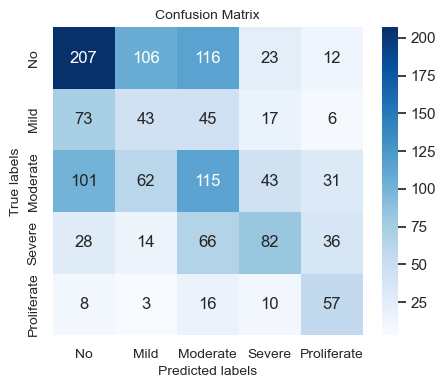

In [58]:
cm = confusion_matrix(y_predicted,y_test)

plt.figure(figsize=(5, 4))
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=10);ax.set_ylabel('True labels', fontsize=10);
ax.set_title('Confusion Matrix', fontsize=10);
ax.xaxis.set_ticklabels(['No','Mild','Moderate','Severe','Proliferate'], fontsize=10); ax.yaxis.set_ticklabels(['No','Mild','Moderate','Severe','Proliferate'], fontsize=10);